# Assignment 8


https://think.cs.vt.edu/corgis/csv/cars/cars.html

### Download the data

- Programatically download the data from the above link.
- Import the data into a Pandas dataframe.
- Show the head of the Pandas dataframe.

### Linear regression

- Perform linear regression on the downloaded dataset, where `y=Highway mpg` and `x=Horsepower`.
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is `y` when `x=2000`.
- Show the regression line on a scatterplot with the other datapoints.

### Classification

- Using `sklearn` create a classifier that can predict the make of a car, based on provided features. The following features should be included:
  - `City mpg`
  - `Highway mpg`
  - `Height`
  - `Width`
  - `Length`
  - `Horsepower`
  - `Year`
- Show the decisiontree of your model.
- Use your model to predict the make of a car.

## Review questions 

1. Did the student programatically download and import the data?
2. Did the student correctly display the regression line in a graph`?
3. Did the student find the coefficient of the line, and reflect on its meaning?
4. Did the student correctly provide their classification model with imported data?
---

In [83]:
import urllib.request as req
import matplotlib.pyplot as plt
from pprint import pprint as pp
import pandas as pd
import sklearn.linear_model as lm
import numpy as np
from sklearn.tree import DecisionTreeClassifier as dtc
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG, display

## Part 1, Download the data

In [27]:
url = 'https://think.cs.vt.edu/corgis/csv/cars/cars.csv?forcedownload=1'

def download(url, to=None):
    data = req.urlretrieve(url, to)
    return data[0]
    
file_name = download(url, 'data.csv')

In [32]:
df = pd.read_csv(file_name)
df.head()

,City mpg,Classification,Driveline,Engine Type,Fuel Type,Height,Highway mpg,Horsepower,Hybrid,ID,Length,Make,Model Year,Number of Forward Gears,Torque,Transmission,Width,Year
0,18,Automatic transmission,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,Gasoline,140,25,250,False,2009 Audi A3 3.2,143,Audi,2009 Audi A3,6,236,6 Speed Automatic Select Shift,202,2009
1,22,Automatic transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T AT,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009
2,21,Manual transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,30,200,False,2009 Audi A3 2.0 T,143,Audi,2009 Audi A3,6,207,6 Speed Manual,202,2009
3,21,Automatic transmission,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T Quattro,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009
4,21,Automatic transmission,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T Quattro,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009


## Part 2, Linear regression

In [34]:
x = df.loc[:,'Horsepower']
y = df.loc[:,'Highway mpg']

print(x)
print(y)

0       250
1       200
2       200
3       200
4       200
5       265
6       265
7       350
8       280
9       211
10      211
11      265
12      280
13      305
14      555
15      555
16      555
17      555
18      185
19      185
20      185
21      185
22      185
23      185
24      185
25      185
26      185
27      310
28      310
29      310
       ... 
5046    274
5047    305
5048    305
5049    268
5050    355
5051    505
5052    310
5053    310
5054    310
5055    310
5056    122
5057    122
5058    117
5059    117
5060    117
5061    117
5062    248
5063    248
5064    248
5065    248
5066    248
5067    250
5068    250
5069    250
5070    250
5071    250
5072    552
5073    552
5074    315
5075    315
Name: Horsepower, Length: 5076, dtype: int64
0       25
1       28
2       30
3       28
4       28
5       27
6       26
7       18
8       20
9       30
10      27
11      26
12      29
13      26
14      17
15      17
16      17
17      17
18      25
19      25
20 

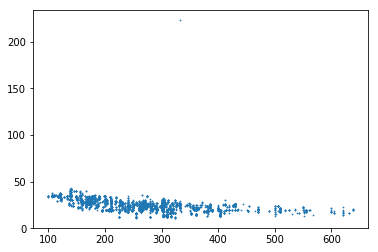

In [39]:
plt.scatter(x, y, s=0.5)

In [47]:
x_reshape = np.array(x).reshape(-1, 1)

model = lm.LinearRegression()
model.fit(x_reshape, y)

alpha = model.coef_
beta = model.intercept_


### What is the coefficient (slope) of your model? What does this number mean?

In [55]:
print('coefficient:', alpha[0])

coefficient: -0.03732550445990135


This number means that when x increases by one y increases by the coefficient

### According to your model, what is y when x=2000.

In [62]:
print('y at x = 2000:', model.predict([[2000]])[0])

y at x = 2000: -40.4289895095998


### Show the regression line on a scatterplot with the other datapoints.

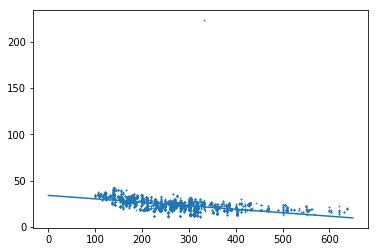

In [64]:
plt.scatter(x, y, s=0.5)
plt.plot([0, 650],[model.predict([[0]]), model.predict([[650]])])

## Part 3, Classification

### Using `sklearn` create a classifier that can predict the make of a car, based on provided features. The following features should be included:
  - `City mpg`
  - `Highway mpg`
  - `Height`
  - `Width`
  - `Length`
  - `Horsepower`
  - `Year`

In [129]:
features = ['City mpg', 'Highway mpg', 'Height', 'Width', 'Length', 'Horsepower', 'Year']

model = dtc(max_leaf_nodes=4, random_state=0)
model.fit(df[features], df['Make'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

### Show the decisiontree of your model.

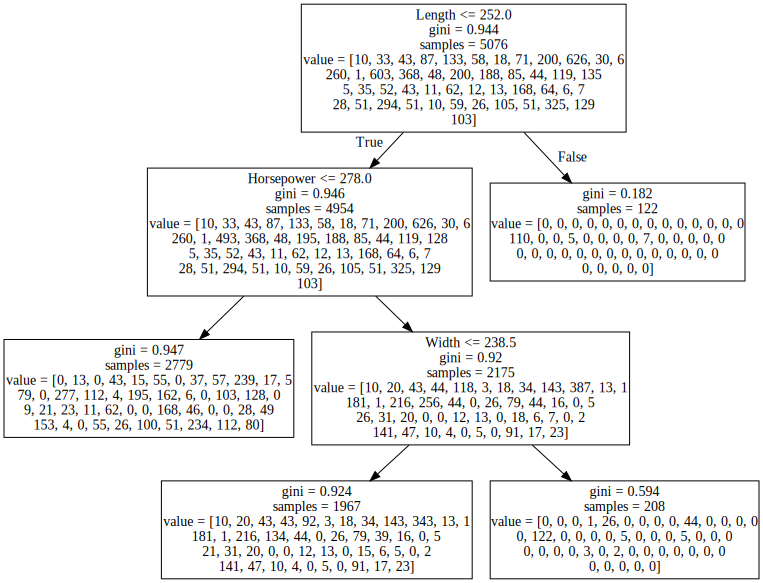

In [130]:
graph = Source( export_graphviz(model, out_file=None, feature_names=features))
SVG(graph.pipe(format='svg'))

In [132]:
# features = ['City mpg', 'Highway mpg', 'Height', 'Width', 'Length', 'Horsepower', 'Year']

prediction_1 = model.predict([[30, 50, 1.5, 2, 6, 500, 2030]])
prediction_2 = model.predict([[15, 20, 150, 100, 500, 70, 2010]])

print(prediction_1)
print(prediction_2)

['Chevrolet']
['Ford']
